# Teste para Duas Médias - ANOVA (Analysis of Variance)

Análise de variância é a técnica estatística que permite avaliar afirmações sobre as médias de populações. A análise visa, fundamentalmente, verificar se existe uma diferença significativa entre as médias e se os fatores exercem influência em alguma variável dependente, com $k$ populaçõess com médias $\mu_i$ desconhecidas.

Os pressupostos básicos da análise de variância são:

- As amostras são aleatórias e independentes
- As populações têm distribuição normal (o teste é paramétrico)
- As variâncias populacionais são iguais

Na prática, esses pressupostos não precisam ser todos rigorosamente satisfeitos. Os resultados são empiricamente verdadeiros sempre que as populações são aproximadamente normais (isso é, não muito assimétricas) e têm variâncias próximas. 

Queremos testar se as $k$ médias são iguais, para isto vamos utilizara tabela **ANOVA - Analysis of Variance**

Variação dos dados:

<br>
$$SQT = \sum_{i=1}^{k}\sum_{j=1}^{n_i} (x_{ij}- \overline x)^2 = 
        \sum_{i=1}^{k}\sum_{j=1}^{n_i} x_{ij}^2 - 
        \frac{1}{n}\Big(\sum_{i=1}^{k}\sum_{j=1}^{n_i} x_{ij}\Big)^2 $$
<br><br>
$$SQE = \sum_{i=1}^{k} n_i(\overline x_{i}- \overline x)^2 =
        \sum_{i=1}^{k} \frac{1}{n_i}\Big (\sum_{j=1}^{n_i} x_{ij}\Big)^2 -
        \frac{1}{n}\Big(\sum_{i=1}^{k}\sum_{j=1}^{n_i} x_{ij}\Big)^2 $$
<br><br>
$$SQR =  \sum_{i=1}^{k}\sum_{j=1}^{n_i} x_{ij}^2 -
         \sum_{i=1}^{k} \frac{1}{n_i}\Big (\sum_{j=1}^{n_i} x_{ij}\Big)^2$$
<br><br>
Verifica-se que:

$$SQT=SQE+SQR$$

onde:

- SQT: Soma dos Quadrados Total
- SQE: Soma dos Quadrados Explicada
- SQR: Soma dos Quadrados dos Resíduos

<br><br>
<img src="img/anova.png" width="450" />
<br><br>

Dentro das premissas de variáveis aleatórias e independentes, o ideal é que cada uma das variáveis de um modelo explique uma determinadda parte da variável dependente. Com isso, podemos imaginar como o *fit* desejado, veriáveis independentes entre si conforme ilustrado na figura abaixo.

<br><br>
<img src="img/anova_explicada.png" width="350" />
<br><br>

# Exemplo: DataSet de crescimento de dentes com duas terapias diferentes

O DataSet representa o crescimento de dentes em animais submetidos a duas terapias alternativas, onde a resposta é o comprimento dos odontoblastos (células responsáveis pelo crescimento dentário) em 60 porquinhos-da-índia. Cada animal recebeu um dos três níveis de dose de vitamina C (0,5, 1 e 2 mg / dia) por um dos dois métodos de entrega (suco de laranja "OJ" ou ácido ascórbico (uma forma de vitamina C e codificada como "CV").

Uma vantagem importante do ANOVA de duas vias é que ele é mais eficiente em comparação com o one-way. Existem duas fontes de variação designáveis supp e dose em nosso exemplo - e isso ajuda a reduzir a variação de erros, tornando esse design mais eficiente. A ANOVA bidirecional (fatorial) pode ser usada para, por exemplo, comparar as médias das populações que são diferentes de duas maneiras. Também pode ser usado para analisar as respostas médias em um experimento com dois fatores. Ao contrário do One-Way ANOVA, ele nos permite testar o efeito de dois fatores ao mesmo tempo. Pode-se também testar a independência dos fatores, desde que haja mais de uma observação em cada célula. A única restrição é que o número de observações em cada célula deve ser igual (não existe tal restrição no caso de ANOVA unidirecional).

Discutimos modelos lineares mais cedo - e ANOVA é de fato um tipo de modelo linear - a diferença é que ANOVA é onde você tem fatores discretos cujo efeito em um resultado contínuo (variável) você quer entender.

## Importando as bibliotecas

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

## Importando os dados

In [2]:
datafile = "data/ToothGrowth.csv"
data = pd.read_csv(datafile)

In [3]:
data.head()

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
Unnamed: 0    60 non-null int64
len           60 non-null float64
supp          60 non-null object
dose          60 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB


In [5]:
data.describe()

,Unnamed: 0,len,dose
count,60.000000,60.000000,60.000000
mean,30.500000,18.813333,1.166667
std,17.464249,7.649315,0.628872
min,1.000000,4.200000,0.500000
25%,15.750000,13.075000,0.500000
50%,30.500000,19.250000,1.000000
75%,45.250000,25.275000,2.000000
max,60.000000,33.900000,2.000000


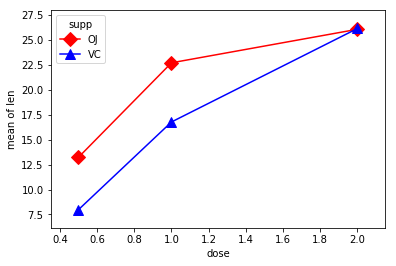

In [6]:
fig = interaction_plot(data.dose, data.supp, data.len,
             colors=['red','blue'], markers=['D','^'], ms=10)

## Calculando a soma dos quadrados

<br>
<img src="img/SS.png">
<br>

In [7]:
# Graus de liberdade

N = len(data.len)
df_a = len(data.supp.unique()) - 1
df_b = len(data.dose.unique()) - 1
df_axb = df_a*df_b 
df_w = N - (len(data.supp.unique())*len(data.dose.unique()))

In [8]:
grand_mean = data['len'].mean()

In [9]:
# SS para o fator A
ssq_a = sum([(data[data.supp ==l].len.mean()-grand_mean)**2 for l in data.supp])

# SS para o fator B
ssq_b = sum([(data[data.dose ==l].len.mean()-grand_mean)**2 for l in data.dose])

# SS total
ssq_t = sum((data.len - grand_mean)**2)

## SS do resíduo
vc = data[data.supp == 'VC']
oj = data[data.supp == 'OJ']
vc_dose_means = [vc[vc.dose == d].len.mean() for d in vc.dose]
oj_dose_means = [oj[oj.dose == d].len.mean() for d in oj.dose]
ssq_w = sum((oj.len - oj_dose_means)**2) +sum((vc.len - vc_dose_means)**2)

# SS de AxB (iterativa)
ssq_axb = ssq_t-ssq_a-ssq_b-ssq_w

## Média dos Quadrados

In [10]:
# MQ da A
ms_a = ssq_a/df_a

# MQ de B
ms_b = ssq_b/df_b

# MQ de AxB
ms_axb = ssq_axb/df_axb

# MQ do resíduo
ms_w = ssq_w/df_w

## F-Score

In [11]:
# F-Score de A
f_a = ms_a/ms_w

# F-Score de B
f_b = ms_b/ms_w

# F-Score de C
f_axb = ms_axb/ms_w

## p-Value

In [12]:
# p-Value de A
p_a = stats.f.sf(f_a, df_a, df_w)

# p-Value de B
p_b = stats.f.sf(f_b, df_b, df_w)

# p-Value de C
p_axb = stats.f.sf(f_axb, df_axb, df_w)

## Resultados

In [13]:
# Colocando os resultados em um DataFrame

results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
            'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns=['sum_sq', 'df', 'F', 'PR(>F)']
 
aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['supp', 'dose', 
                          'supp:dose', 'Residual'])

In [14]:
# Calculando Eta-Squared e Omega-Squared, e imprimindo a tabela

def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
 
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov
 
 
eta_squared(aov_table1)
omega_squared(aov_table1)
print(aov_table1)

                sum_sq  df        F       PR(>F)    eta_sq  omega_sq
supp        205.350000   1   15.572  0.000231183  0.059484  0.055452
dose       2426.434333   2       92  4.04629e-18  0.702864  0.692579
supp:dose   108.319000   2  4.10699    0.0218603  0.031377  0.023647
Residual    712.106000  54      NaN          NaN       NaN       NaN


### Comentários

Os resultados da variável dose tem a maior distância do valor médio (sum_sq) e portanto a maior variância relatica (F-Score). Isto pode ser comprovado pelo Eta-Squared e Omega-Squared (definição abaixo).

### Mais sobre Eta-Squared e Omega-Squared

Outro conjunto de medidas de tamanho de efeito para variáveis independentes categóricas tem uma interpretação mais intuitiva e é mais fácil de avaliar. Eles incluem o Eta Squared, o Parcial Eta Squared e o Omega Squared. Como a estatística R Squared, todos eles têm a interpretação intuitiva da proporção da variância contabilizada.

Eta Squared é calculado da mesma forma que R Squared, e tem a interpretação mais equivalente: da variação total em Y, a proporção que pode ser atribuída a um X específico.

O Eta Squared, no entanto, é usado especificamente em modelos ANOVA. Cada efeito categórico no modelo tem seu próprio Eta Squared, de modo que você obtenha uma medida específica e intuitiva do efeito dessa variável.

A desvantagem do Eta Squared é que é uma medida tendenciosa da variância da população explicada (embora seja exata para a amostra), sempre superestima.

Esse viés fica muito pequeno à medida que o tamanho da amostra aumenta, mas para amostras pequenas, uma medida de tamanho de efeito imparcial é Omega Squared. Omega Squared tem a mesma interpretação básica, mas usa medidas imparciais dos componentes de variância. Por ser uma estimativa imparcial das variâncias populacionais, o Omega Squared é sempre menor que o Eta Squared (ES).

Não há padrões acordados sobre como interpretar um ES. A interpretação é basicamente subjetiva. Melhor abordagem é comparar com outros estudos.

Cohen (1977):
- 0.2 = pequeno
- 0.5 = moderado
- 0.8 = grande

## ANOVA com Statsmodels

In [15]:
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)

eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

                      sum_sq    df          F        PR(>F)    eta_sq  \
C(supp)           205.350000   1.0  15.571979  2.311828e-04  0.059484   
C(dose)          2426.434333   2.0  91.999965  4.046291e-18  0.702864   
C(supp):C(dose)   108.319000   2.0   4.106991  2.186027e-02  0.031377   
Residual          712.106000  54.0        NaN           NaN       NaN   

                 omega_sq  
C(supp)          0.055452  
C(dose)          0.692579  
C(supp):C(dose)  0.023647  
Residual              NaN  


## Quantile-Quantile (QQplot)

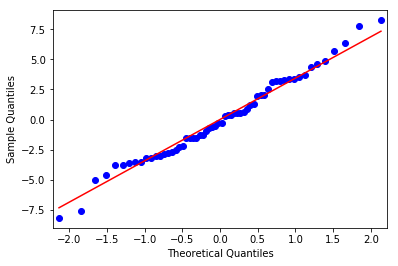

In [16]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()